### importing libraries

In [2]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn_extra.cluster import KMedoids
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc  
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
from sklearn.decomposition import TruncatedSVD

### importing Data

In [3]:
categories = ['rec.motorcycles', 'sci.electronics',
              'comp.graphics', 'sci.med']

# sklearn provides us with subset data for training and testing
train_data = fetch_20newsgroups(subset='train',
                                categories=categories, shuffle=True, random_state=42)

test_data = fetch_20newsgroups(subset='test',
                               categories=categories, shuffle=True, random_state=42)

### K-means Clustering

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_transformer = TfidfVectorizer(max_df=0.5, min_df=0.2, stop_words='english')
X_train_tfidf = tfidf_transformer.fit_transform(train_data.data)
km = KMeans(n_clusters=4, init='k-means++', max_iter=100, n_init=1) 
km.fit(X_train_tfidf )
predicted=km.predict(X_train_tfidf)
print("Homogeneity: %0.3f"% metrics.homogeneity_score(train_data.target, predicted)) 
print("Completeness: %0.3f" % metrics.completeness_score(train_data.target, predicted)) 
print("V-measure: %0.3f" % metrics.v_measure_score(train_data.target, predicted)) 
print("Silhouette Coefficien: %0.3f"% metrics.silhouette_score(X_train_tfidf, predicted , sample_size=1000))


Homogeneity: 0.023
Completeness: 0.024
V-measure: 0.023
Silhouette Coefficien: 0.158


              precision    recall  f1-score   support

           0       0.31      0.15      0.20       584
           1       0.21      0.27      0.24       598
           2       0.27      0.25      0.26       591
           3       0.27      0.35      0.31       594

    accuracy                           0.26      2367
   macro avg       0.27      0.26      0.25      2367
weighted avg       0.27      0.26      0.25      2367

0.25686523024926067


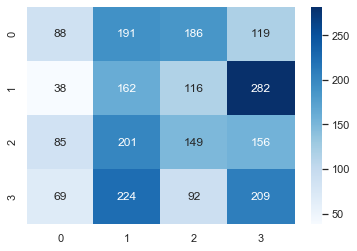

In [5]:
cm=metrics.confusion_matrix(train_data.target,predicted)
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
print(metrics.classification_report(train_data.target,predicted))
print(metrics.accuracy_score(train_data.target,predicted))

### Hierachical Clustering 

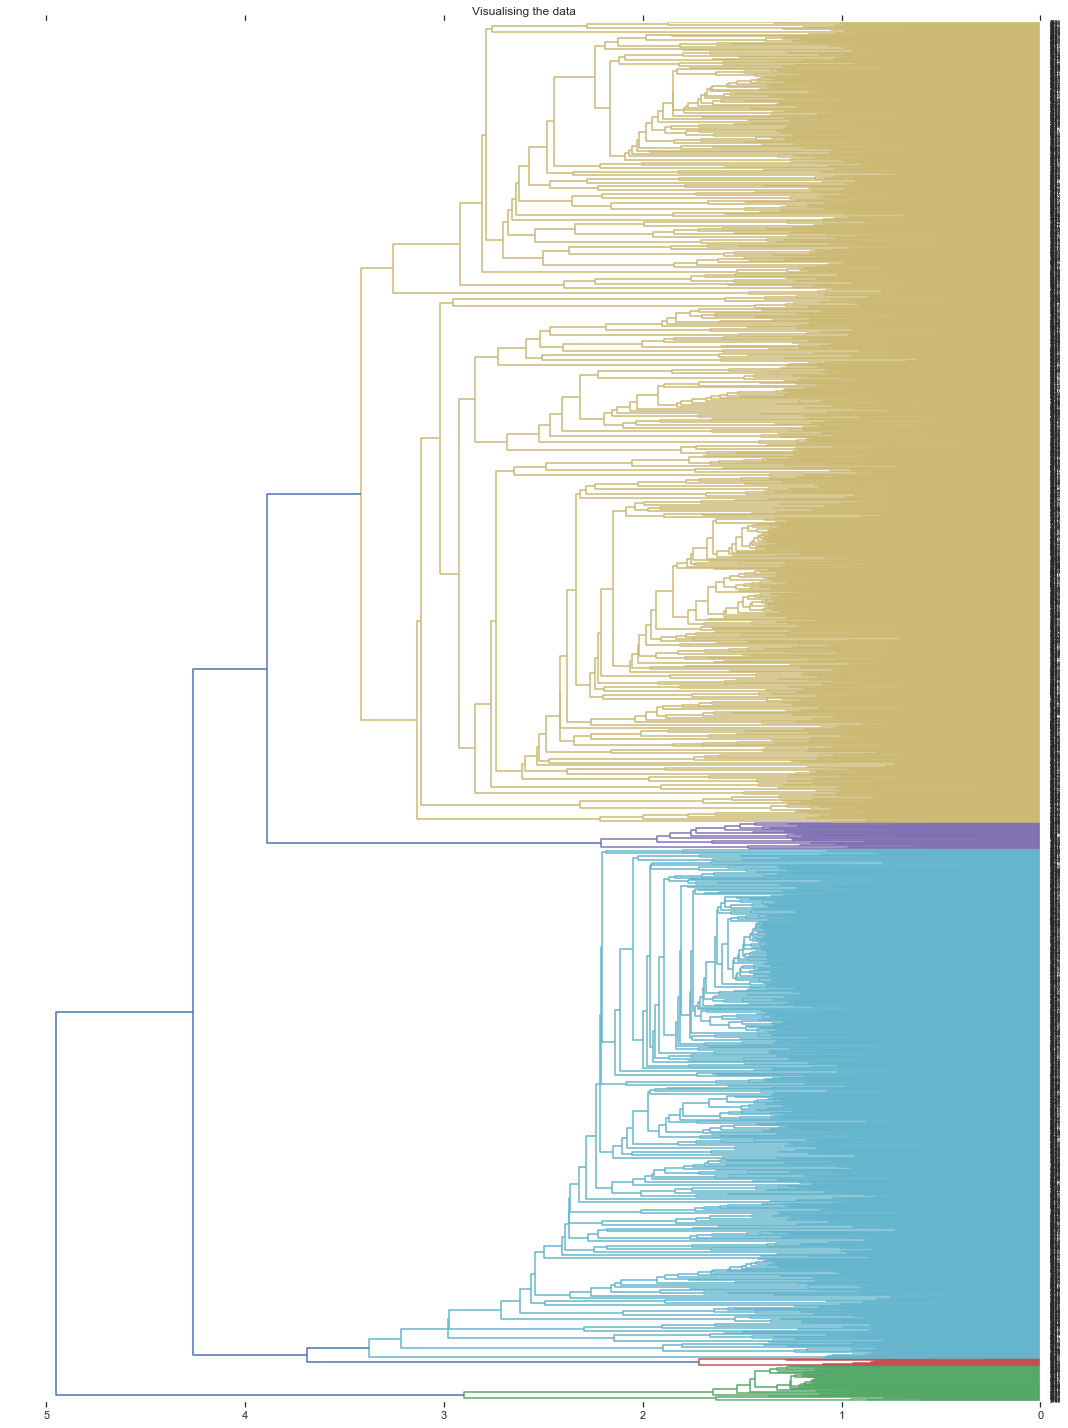

In [10]:
hc= AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
#countvectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train_data.data)

#tfidf vectorizer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf=X_train_tfidf.todense() 

#plotting of dendrograph
fig, ax = plt.subplots(figsize=(15, 20)) # set size
plt.title('Visualising the data')
ax= shc.dendrogram((shc.linkage(X_train_tfidf, method ='ward')),orientation="left")


plt.tick_params(\
    axis= 'x',         
    which='both',      
    bottom='off',      
    top='off',        
    labelbottom='off')

plt.tight_layout()

#fitting data into Heirarchical classifier
hc = hc.fit_predict(X_train_tfidf)



              precision    recall  f1-score   support

           0       0.52      0.79      0.63       584
           1       0.00      0.00      0.00       598
           2       0.27      0.63      0.38       591
           3       1.00      0.08      0.14       594

    accuracy                           0.37      2367
   macro avg       0.45      0.37      0.29      2367
weighted avg       0.45      0.37      0.28      2367

0.3717786227291931


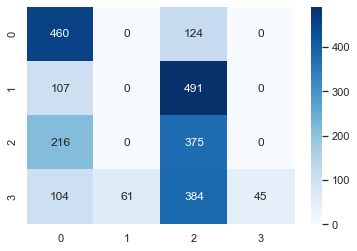

In [11]:
cm=metrics.confusion_matrix(train_data.target,hc)
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
print(metrics.classification_report(train_data.target,hc))
print(metrics.accuracy_score(train_data.target,hc))


In [12]:
print("Homogeneity: %0.3f"% metrics.homogeneity_score(train_data.target, hc)) 
print("Completeness: %0.3f" % metrics.completeness_score(train_data.target, hc)) 
print("V-measure: %0.3f" % metrics.v_measure_score(train_data.target, hc)) 
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X_train_tfidf,hc, sample_size=1000))


Homogeneity: 0.136
Completeness: 0.220
V-measure: 0.168
Silhouette Coefficient: -0.007


### K-medoids Clustering

In [6]:
kMedoids = KMedoids(n_clusters = 4, random_state = 0)
#pipelinnig the fuctions
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', kMedoids)
])
pipeline.fit(train_data.data)
predicted = pipeline.predict(train_data.data)


              precision    recall  f1-score   support

           0       0.05      0.03      0.04       584
           1       0.17      0.32      0.22       598
           2       0.69      0.38      0.49       591
           3       0.05      0.05      0.05       594

    accuracy                           0.20      2367
   macro avg       0.24      0.19      0.20      2367
weighted avg       0.24      0.20      0.20      2367

0.19560625264047318


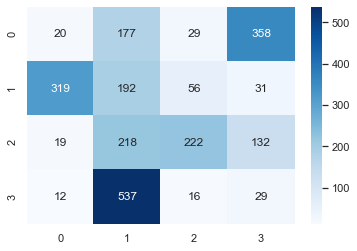

In [7]:
cm=metrics.confusion_matrix(train_data.target,predicted)
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
print(metrics.classification_report(train_data.target,predicted))
print(metrics.accuracy_score(train_data.target,predicted))


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_transformer = TfidfVectorizer(max_df=0.5, min_df=0.2, stop_words='english')
X_train_tfidf = tfidf_transformer.fit_transform(train_data.data)
kMedoids = KMedoids(n_clusters = 3, random_state = 0)
kMedoids.fit(X_train_tfidf)
predicted=km.predict(X_train_tfidf)
print("Homogeneity: %0.3f"% metrics.homogeneity_score(train_data.target, predicted)) 
print("Completeness: %0.3f" % metrics.completeness_score(train_data.target, predicted)) 
print("V-measure: %0.3f" % metrics.v_measure_score(train_data.target,predicted)) 
print("Silhouette Coefficien: %0.3f"% metrics.silhouette_score(X_train_tfidf, predicted , sample_size=1000))


Homogeneity: 0.023
Completeness: 0.024
V-measure: 0.023
Silhouette Coefficien: 0.151


C:\Users\Shruti\AppData\Roaming\Python\Python37\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  "its corresponding cluster ({k}).".format(k=k)
C:\Users\Shruti\AppData\Roaming\Python\Python37\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  "its corresponding cluster ({k}).".format(k=k)
